# Potential Fraud Detection of advanced credit card applicants using Self Organizing Maps (SOM)

## Business Problem

The data set that contains information of customers of a large Australian bank applying for an advanced credit card. These information are provided by the customers while filling the application forms. The objective here is to detect potential fraud applicants within these applications and a give a list of customers that might be potentially fraud.

## Solution

Since we do not have any training data set that identifies the potential fraud applicants, I'll not be able to train a model based on Supervised learning. So I'll be treating this problem as a Unsupervised learning problem.
Hence, the method I'm using to solve this unsupervised problem is unsupervised deep learning model called Self Organizing Maps (SOM)

## Code

In [33]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [35]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


In [52]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


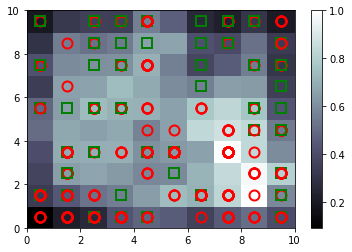

In [53]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# Green box means applicants were accepted by bank
# Red circle means applicants were rejected by bank
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [54]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(8,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [57]:
print("Total potential fraud applicants: ",len(frauds),"\n")
print(pd.DataFrame(frauds))

Total potential fraud applicants:  22 

            0    1      2       3    4     5    6      7    8    9    10   11  \
0   15699839.0  0.0  28.17   0.585  2.0   6.0  4.0  0.040  0.0  0.0  0.0  0.0   
1   15705918.0  0.0  37.33   2.500  2.0   3.0  8.0  0.210  0.0  0.0  0.0  0.0   
2   15706762.0  0.0  40.83   3.500  2.0   3.0  5.0  0.500  0.0  0.0  0.0  0.0   
3   15672894.0  0.0  18.58  10.000  2.0   2.0  4.0  0.415  0.0  0.0  0.0  0.0   
4   15783883.0  0.0  38.92   1.665  2.0   6.0  4.0  0.250  0.0  0.0  0.0  0.0   
5   15756538.0  0.0  39.08   4.000  2.0   8.0  4.0  3.000  0.0  0.0  0.0  0.0   
6   15651868.0  0.0  38.75   1.500  2.0   1.0  1.0  0.000  0.0  0.0  0.0  0.0   
7   15728523.0  0.0  38.33   4.415  2.0   8.0  4.0  0.125  0.0  0.0  0.0  0.0   
8   15651460.0  0.0  69.50   6.000  2.0   1.0  1.0  0.000  0.0  0.0  0.0  0.0   
9   15675926.0  0.0  19.17   5.415  2.0   3.0  8.0  0.290  0.0  0.0  0.0  0.0   
10  15672637.0  0.0  36.75   4.710  2.0   1.0  1.0  0.000  0.0  0.0  

Column 0 contains the potential fraud Customer IDs. Columns 1-14 are values that the applicants filled while filling the application forms. Column names are masked to maintain customer's confidentiality and for representation purpose only.